In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,Unnamed: 0,datetime,temp,humidity,dewPoint,appTemp,precipitation,pressure,surfacePressure,cloudCover,windSpeed10m,windSpeed100m,windDir10m,windDir100m,windGusts10m,prod
0,0,2020-01-01 00:00:00,-5.3,98,-5.5,-9.7,0.0,1021.2,828.9,89,10.7,16.0,57,46,21.2,3.40
1,1,2020-01-01 01:00:00,-5.2,97,-5.5,-9.6,0.0,1020.9,828.7,90,10.9,17.8,63,48,22.7,2.97
2,2,2020-01-01 02:00:00,-6.7,97,-7.1,-11.3,0.0,1020.7,827.6,90,11.3,16.6,63,42,23.0,1.28
3,3,2020-01-01 03:00:00,-3.7,99,-3.8,-7.9,0.0,1021.0,829.7,90,10.9,19.3,27,29,23.4,1.29
4,4,2020-01-01 04:00:00,-3.3,99,-3.5,-7.5,0.0,1020.7,829.7,90,10.6,19.6,24,26,23.8,2.85


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       26304 non-null  int64  
 1   datetime         26304 non-null  object 
 2   temp             26304 non-null  float64
 3   humidity         26304 non-null  int64  
 4   dewPoint         26304 non-null  float64
 5   appTemp          26304 non-null  float64
 6   precipitation    26304 non-null  float64
 7   pressure         26304 non-null  float64
 8   surfacePressure  26304 non-null  float64
 9   cloudCover       26304 non-null  int64  
 10  windSpeed10m     26304 non-null  float64
 11  windSpeed100m    26304 non-null  float64
 12  windDir10m       26304 non-null  int64  
 13  windDir100m      26304 non-null  int64  
 14  windGusts10m     26304 non-null  float64
 15  prod             26304 non-null  float64
dtypes: float64(10), int64(5), object(1)
memory usage: 3.2+ MB


In [6]:
test.head()

,Unnamed: 0,datetime,temp,humidity,dewPoint,appTemp,precipitation,pressure,surfacePressure,cloudCover,windSpeed10m,windSpeed100m,windDir10m,windDir100m,windGusts10m,prod
0,0,2023-01-01 00:00:00,-3.3,83,-5.8,-7.6,0.0,1033.1,839.8,0,10.3,21.4,29,27,24.8,NaN
1,1,2023-01-01 01:00:00,-3.4,82,-6.0,-7.8,0.0,1033.1,839.8,0,10.7,21.6,33,28,25.2,NaN
2,2,2023-01-01 02:00:00,-3.5,81,-6.3,-8.0,0.0,1032.6,839.3,0,10.8,21.4,37,33,25.2,NaN
3,3,2023-01-01 03:00:00,-4.2,81,-6.9,-8.8,0.0,1032.7,838.9,9,11.6,23.3,36,35,25.2,NaN
4,4,2023-01-01 04:00:00,-4.2,81,-7.0,-9.0,0.0,1032.5,838.8,17,12.6,23.7,37,36,28.4,NaN


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       744 non-null    int64  
 1   datetime         744 non-null    object 
 2   temp             744 non-null    float64
 3   humidity         744 non-null    int64  
 4   dewPoint         744 non-null    float64
 5   appTemp          744 non-null    float64
 6   precipitation    744 non-null    float64
 7   pressure         744 non-null    float64
 8   surfacePressure  744 non-null    float64
 9   cloudCover       744 non-null    int64  
 10  windSpeed10m     744 non-null    float64
 11  windSpeed100m    744 non-null    float64
 12  windDir10m       744 non-null    int64  
 13  windDir100m      744 non-null    int64  
 14  windGusts10m     744 non-null    float64
 15  prod             0 non-null      float64
dtypes: float64(10), int64(5), object(1)
memory usage: 93.1+ KB


Eksik veri yok (sadece tahmin edeceğimiz prod sütunu boş, bu normal)

---



# Verimizi birleştirip, zaman serisi analizi olup olmadığını inceleyelim.

In [10]:
train['source'] = 'train'
test['source'] = 'test'
test['prod'] = None

combined = pd.concat([train, test], ignore_index=True)

<ipython-input-10-c868c0225dc5>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined = pd.concat([train, test], ignore_index=True)


---
İndeks sütunu bizim icin önemsiz, veriden atabiliriz





In [11]:
combined.drop(columns=['Unnamed: 0'], inplace=True)

---
object türündeki tarih sütunumuzu datatime türüne çevirip, grafiklerle zaman kavramını inceleyelim

In [17]:
combined['datetime'] = pd.to_datetime(combined['datetime'])

combined = combined.sort_values('datetime')

combined['hour'] = combined['datetime'].dt.hour
combined['month'] = combined['datetime'].dt.month
combined['weekday'] = combined['datetime'].dt.weekday

# Genel Zaman Grafiği: Üretim Zamanla Nasıl Değişiyor?

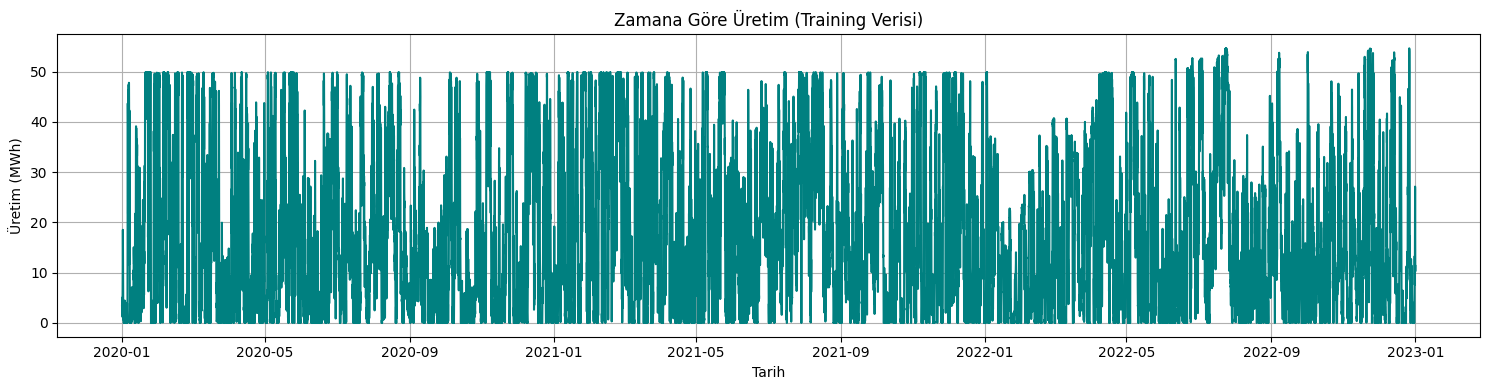

In [18]:
import matplotlib.pyplot as plt

train_only = combined[combined['source'] == 'train']

plt.figure(figsize=(15,4))
plt.plot(train_only['datetime'], train_only['prod'], color='teal')
plt.title('Zamana Göre Üretim (Training Verisi)')
plt.xlabel('Tarih')
plt.ylabel('Üretim (MWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

#Saatlik Ortalamalar: Gün İçinde Üretim Nasıl?

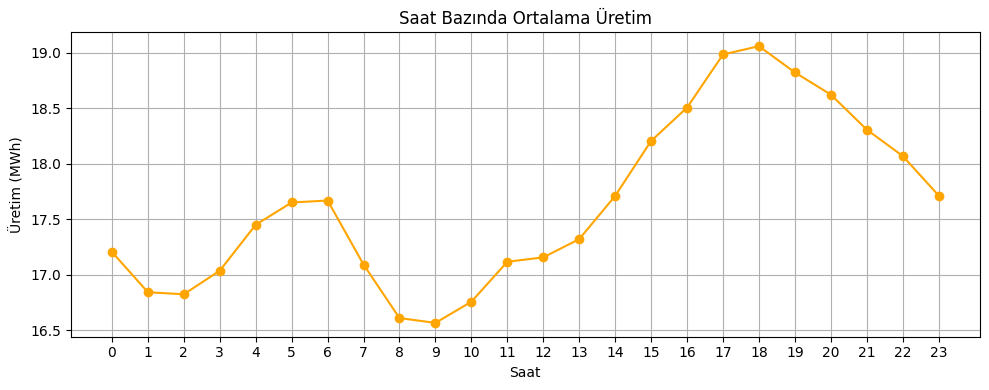

In [23]:
plt.figure(figsize=(10,4))
train_only.groupby('hour')['prod'].mean().plot(kind='line', marker='o', color='orange')
plt.title('Saat Bazında Ortalama Üretim')
plt.xlabel('Saat')
plt.ylabel('Üretim (MWh)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

#Aylara Göre Değişim

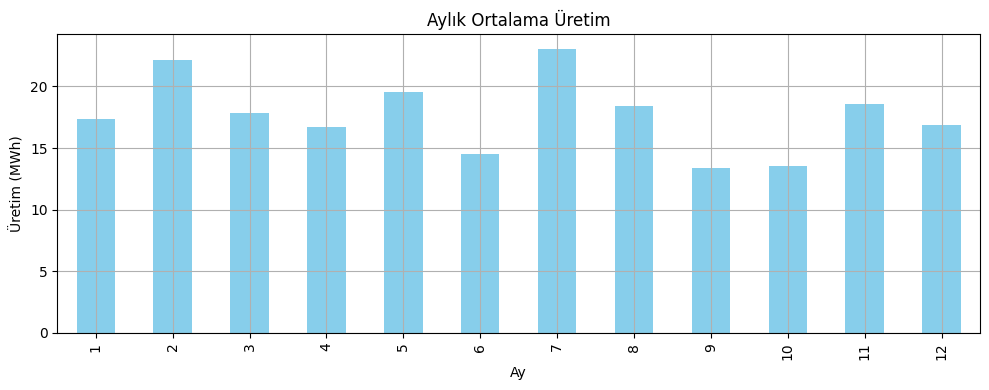

In [19]:
plt.figure(figsize=(10,4))
train_only.groupby('month')['prod'].mean().plot(kind='bar', color='skyblue')
plt.title('Aylık Ortalama Üretim')
plt.xlabel('Ay')
plt.ylabel('Üretim (MWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

#Haftanın Günleri

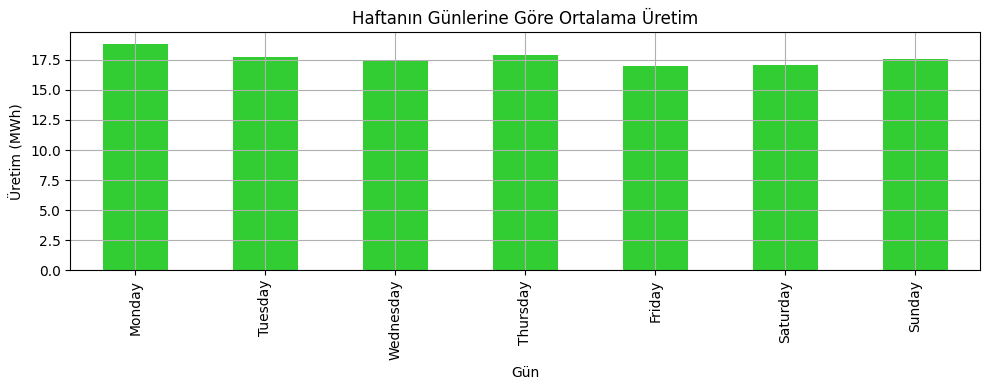

In [20]:
import calendar

plt.figure(figsize=(10,4))
train_only.groupby('weekday')['prod'].mean().plot(kind='bar', color='limegreen')
plt.title('Haftanın Günlerine Göre Ortalama Üretim')
plt.xlabel('Gün')
plt.ylabel('Üretim (MWh)')
plt.xticks(ticks=range(7), labels=[calendar.day_name[i] for i in range(7)])
plt.grid(True)
plt.tight_layout()
plt.show()


Grafikleri incelediğimizde zamana bağlı bir üretimin olmadığını gözlemliyoruz. Rastgelelik mevcuttur. Zaman serisi analizi değil !

---